<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/Logotipo%20con%20Leyenda/LOGOTIPO%20leyenda%20color%20PNG.png", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 100px; text-align:right;">November 2025</p>
<p style="margin: 0; text-align:right;">Data Processes</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Lucía Prieto Santamaría</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# TUNNING HYPERPARAMETERS - Second notebook

# Hyperparameter Tuning Notebook

### Step 1: Imports and Dataset Setup

In case not installed yet, you can install libraries and modules with pip or conda.

```pip install scikit-optimize```

In [ ]:
import numpy as np
import pandas as pd

from scipy.stats import uniform

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.datasets import load_breast_cancer

from sklearn.metrics import accuracy_score

from skopt import BayesSearchCV  # For Bayesian optimization

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# Load a sample dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 2: Model Setup

In [4]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'NaiveBayes': GaussianNB()
}

### Step 3: Hyperparameter Grids for Each Model

In [5]:
param_grids = {
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']},
    'DecisionTree': {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]},
    'RandomForest': {'n_estimators': [50, 100], 'max_depth': [5, 10], 'max_features': ['sqrt', 'log2']},
    'AdaBoost': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1]},
    'GradientBoosting': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']},
    'k-NN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'XGBoost': {'n_estimators': [50, 100], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1, 0.2]},
    'NaiveBayes': {'var_smoothing': np.logspace(-9, -6, 3)}
}

### Step 4: Grid Search

Be aware this can take a bit!!

You can get different warnings here depending on the configurations, so (though not ideal) I will turn them off.

In [6]:
import warnings
warnings.filterwarnings("ignore")

Running Grid Search for LogisticRegression...
Best params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Highest Test Accuracy: 0.9707602339181286



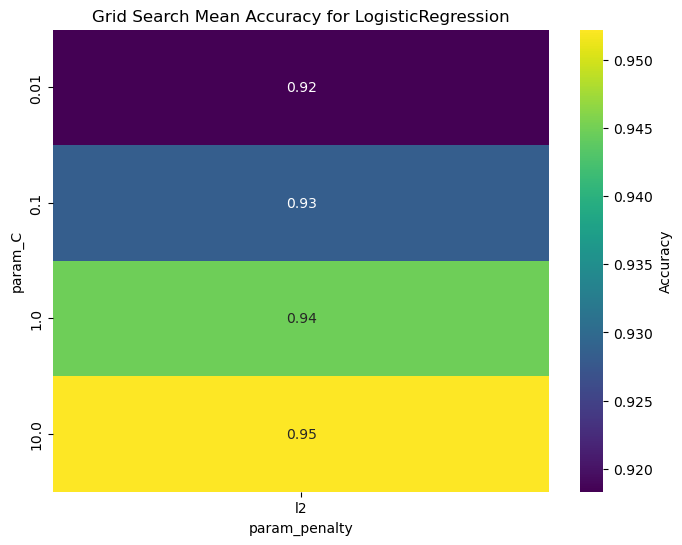

In [7]:
for model_name, model in models.items():
    print(f"Running Grid Search for {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Best params: {grid_search.best_params_}")
    print(f"Highest Test Accuracy: {accuracy_score(y_test, y_pred)}\n")

    # Assuming the grid has 2 hyperparameters
    scores = grid_search.cv_results_['mean_test_score']

    try:
        param1, param2 = [f'param_{x}' for x in list(param_grids[model_name].keys())[:2]]
        heatmap_data = pd.DataFrame(grid_search.cv_results_).pivot_table(values='mean_test_score', index=param1, columns=param2)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(heatmap_data, annot=True, cmap='viridis', cbar_kws={'label': 'Accuracy'})
        plt.title(f'Grid Search Mean Accuracy for {model_name}')
        plt.xlabel(param2)
        plt.ylabel(param1)
        plt.show()
        break
    
    except ValueError:
        print(f'\nNo plot here given that we have just one hyperparameter to tune!!\n\n\n')

### Step 5: Random Search

Running Random Search for LogisticRegression...
Best params: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
Test Accuracy: 0.9707602339181286



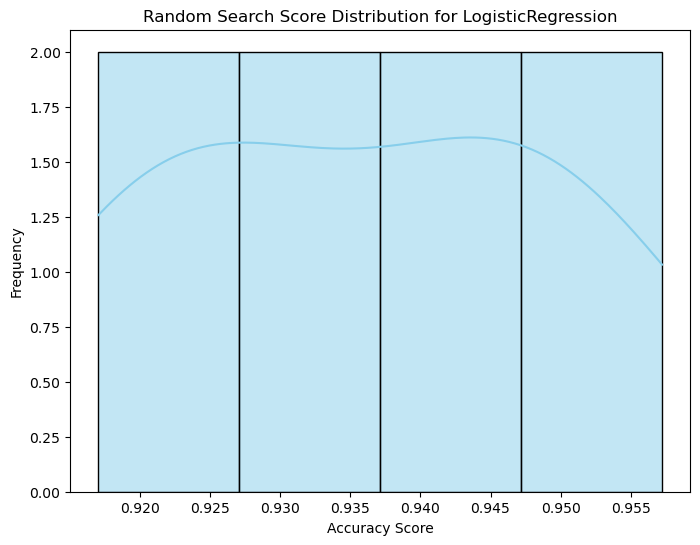

Running Random Search for DecisionTree...
Best params: {'min_samples_split': 5, 'max_depth': 5}
Test Accuracy: 0.9532163742690059



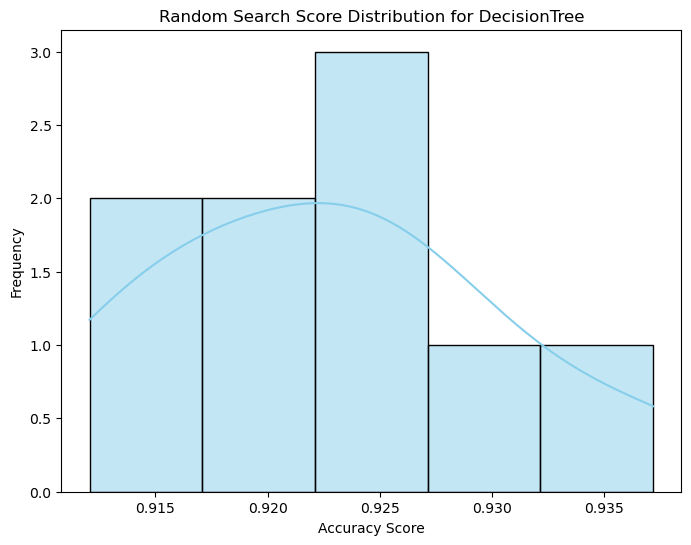

Running Random Search for RandomForest...
Best params: {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 10}
Test Accuracy: 0.9649122807017544



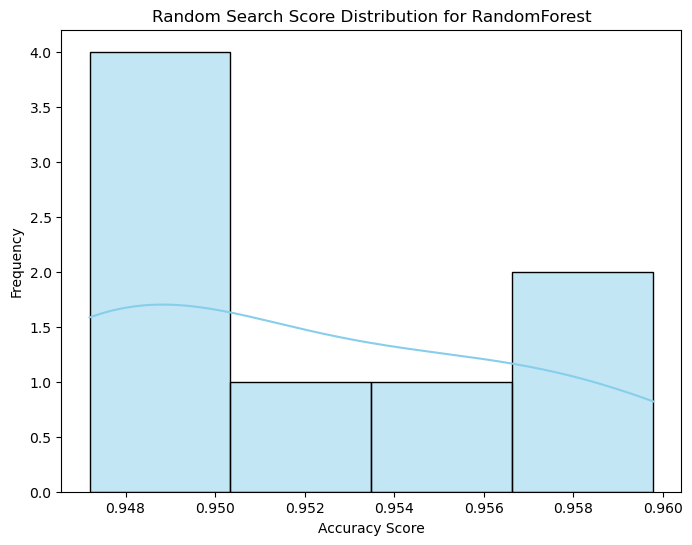

Running Random Search for AdaBoost...
Best params: {'n_estimators': 50, 'learning_rate': 1}
Test Accuracy: 0.9766081871345029



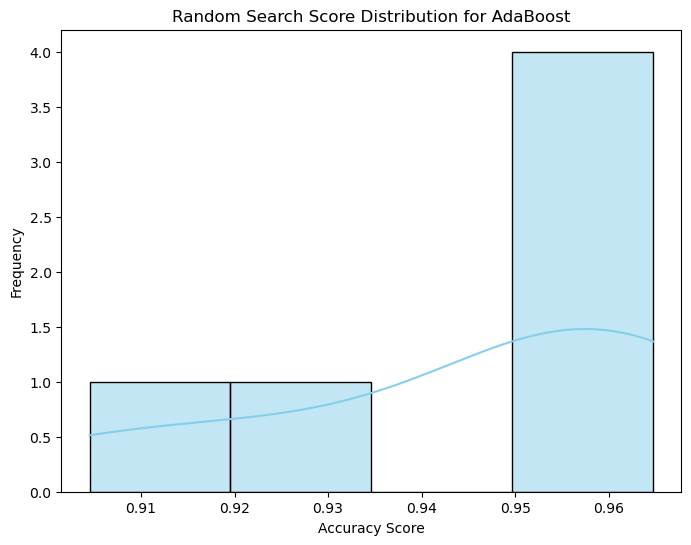

Running Random Search for GradientBoosting...
Best params: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
Test Accuracy: 0.9590643274853801



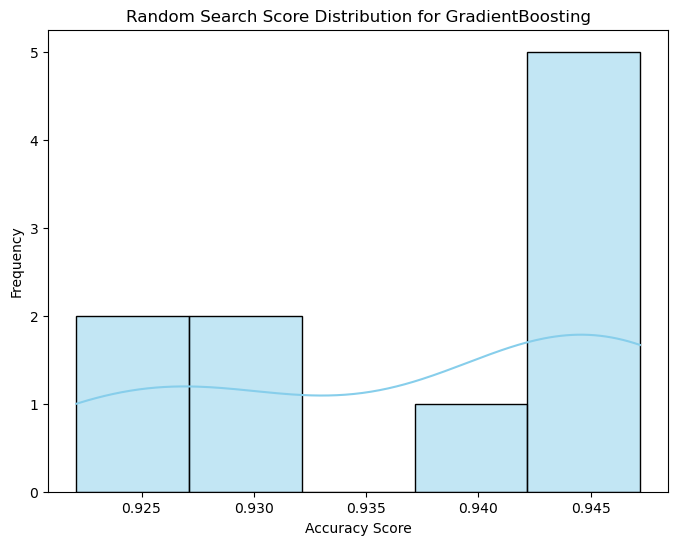

Running Random Search for SVM...
Best params: {'kernel': 'linear', 'gamma': 'auto', 'C': 10}
Test Accuracy: 0.9707602339181286



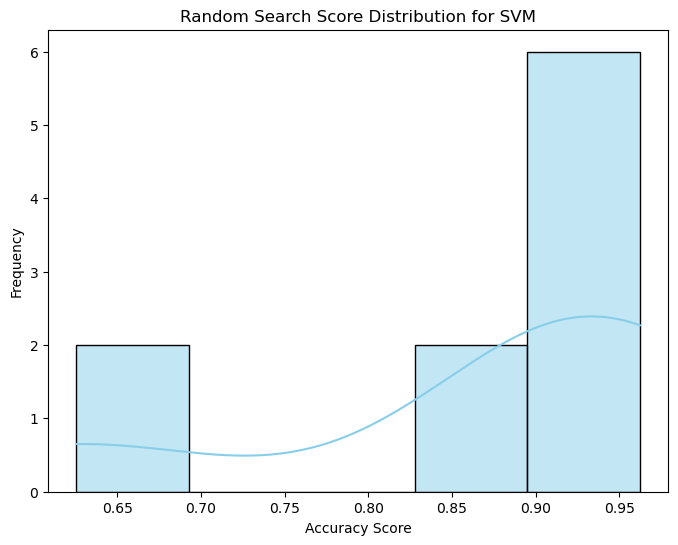

Running Random Search for k-NN...
Best params: {'weights': 'uniform', 'n_neighbors': 5}
Test Accuracy: 0.9590643274853801



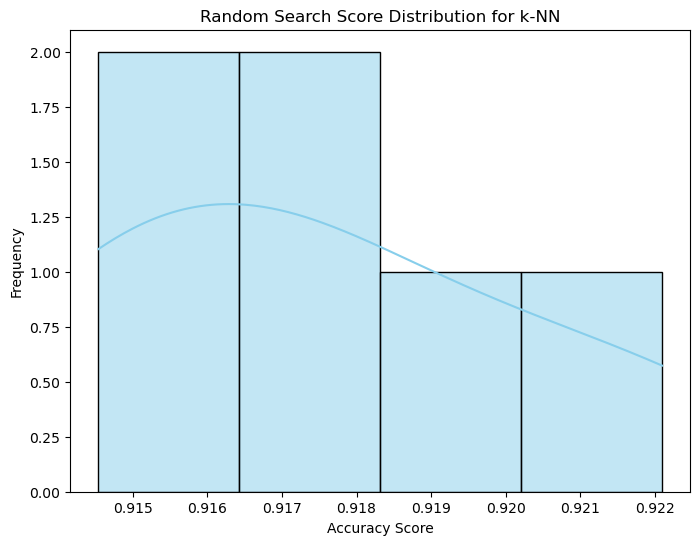

Running Random Search for XGBoost...
Best params: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.2}
Test Accuracy: 0.9532163742690059



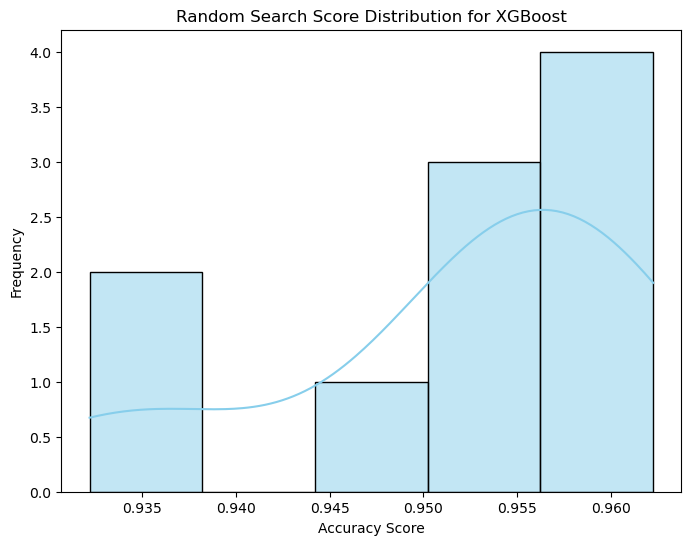

Running Random Search for NaiveBayes...
Best params: {'var_smoothing': 1e-09}
Test Accuracy: 0.9415204678362573



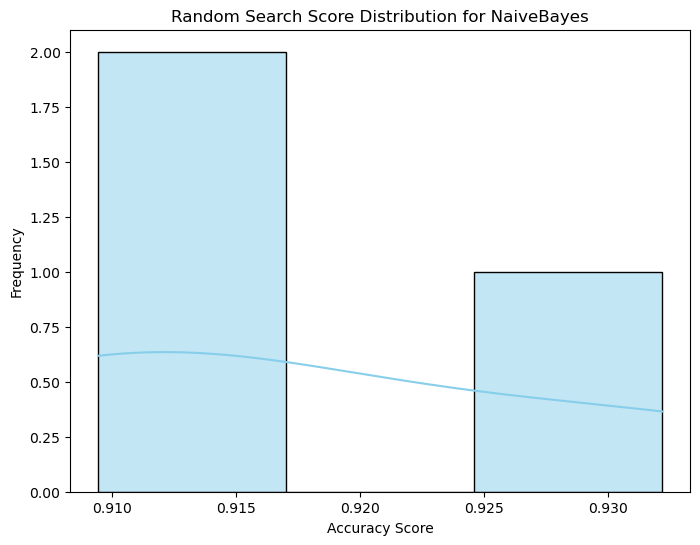

In [8]:
for model_name, model in models.items():
    print(f"Running Random Search for {model_name}...")
    random_search = RandomizedSearchCV(model, param_distributions=param_grids[model_name], n_iter=10, cv=3, scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Best params: {random_search.best_params_}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}\n")


    scores = random_search.cv_results_['mean_test_score']
    
    plt.figure(figsize=(8, 6))
    sns.histplot(scores, kde=True, color="skyblue")
    plt.title(f'Random Search Score Distribution for {model_name}')
    plt.xlabel('Accuracy Score')
    plt.ylabel('Frequency')
    plt.show()

### Step 6: Bayesian Optimization

Running Bayesian Optimization for LogisticRegression...


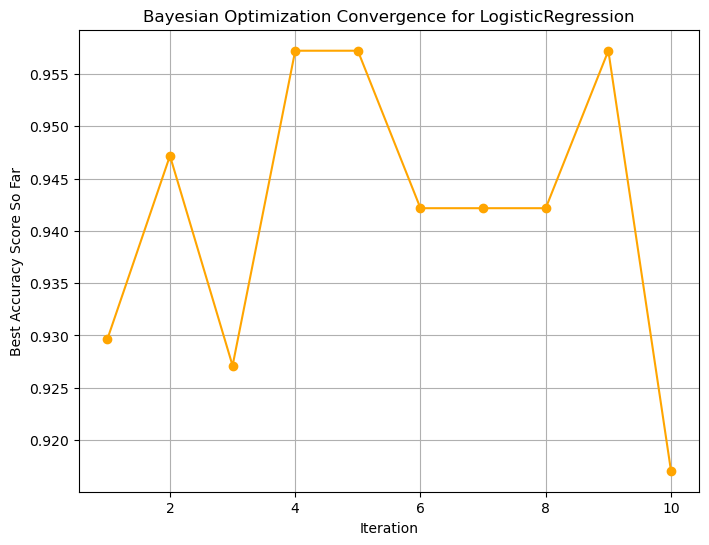

Running Bayesian Optimization for DecisionTree...


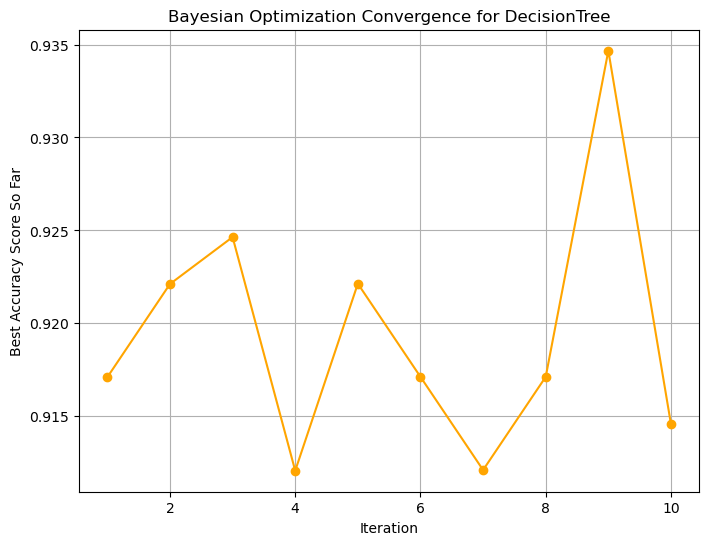

Running Bayesian Optimization for RandomForest...


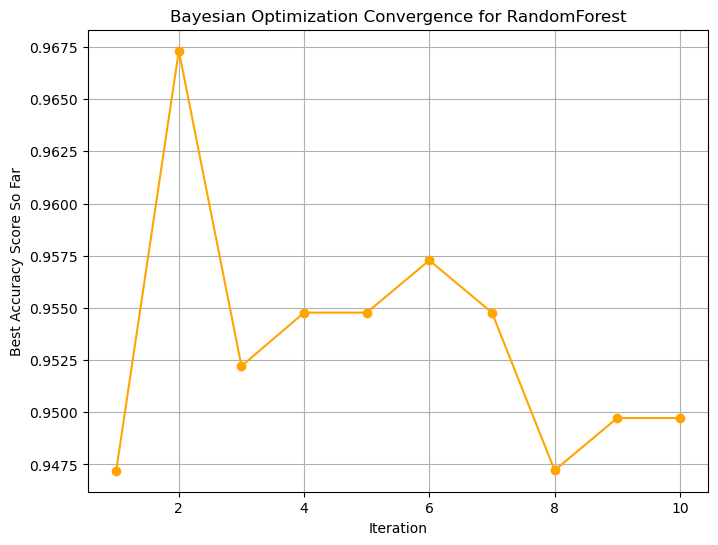

Running Bayesian Optimization for AdaBoost...


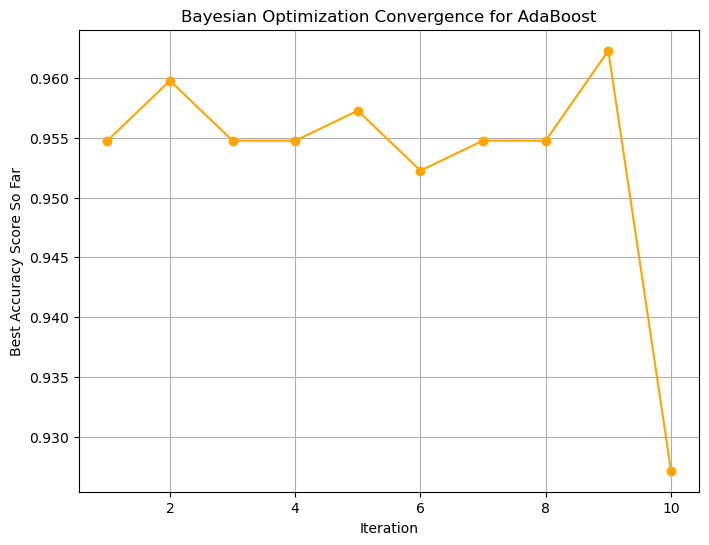

Running Bayesian Optimization for GradientBoosting...


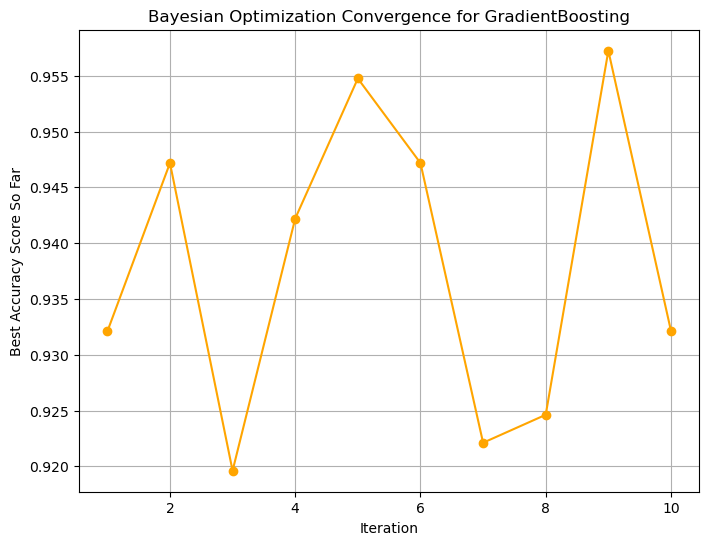

Running Bayesian Optimization for SVM...


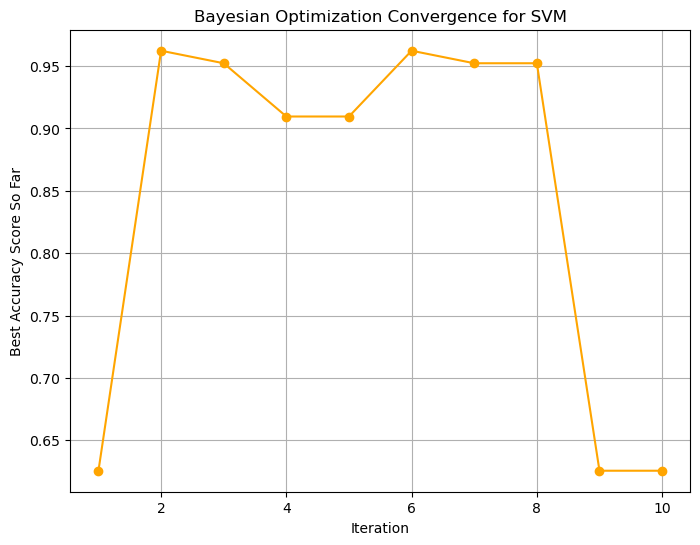

Running Bayesian Optimization for k-NN...


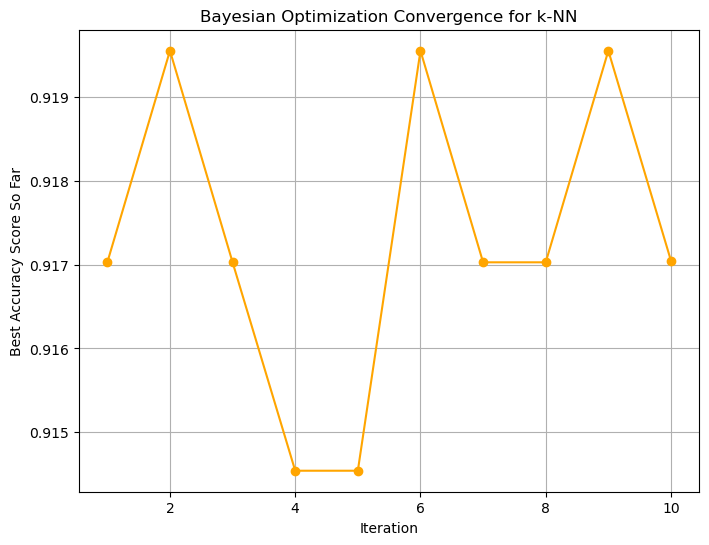

Running Bayesian Optimization for XGBoost...


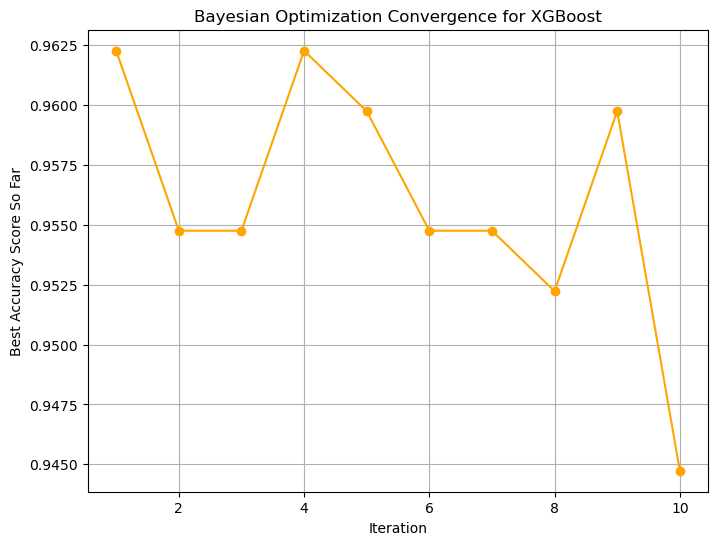

Running Bayesian Optimization for NaiveBayes...


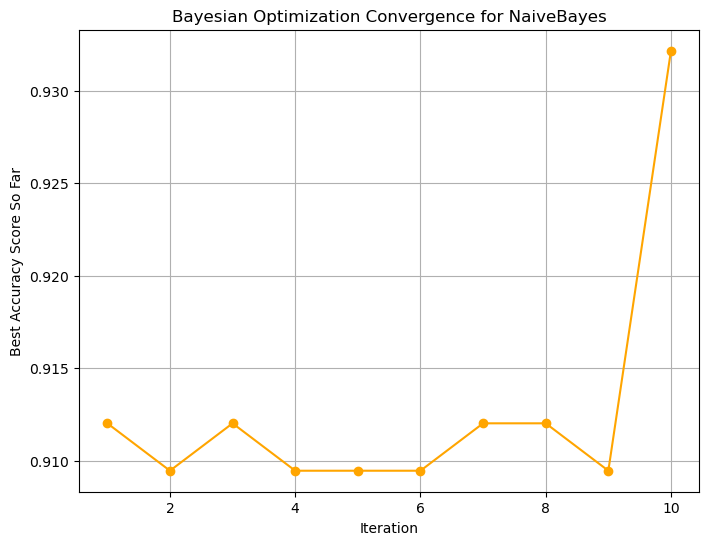

In [9]:
for model_name, model in models.items():
    print(f"Running Bayesian Optimization for {model_name}...")
    bayes_search = BayesSearchCV(model, param_grids[model_name], n_iter=10, cv=3, scoring='accuracy', random_state=42)
    bayes_search.fit(X_train, y_train)
    
    # Track scores over iterations
    scores = bayes_search.cv_results_['mean_test_score']
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(scores) + 1), scores, marker='o', color="orange")
    plt.title(f'Bayesian Optimization Convergence for {model_name}')
    plt.xlabel('Iteration')
    plt.ylabel('Best Accuracy Score So Far')
    plt.grid()
    plt.show()